# Preparación de datos
## Importaciones

In [31]:
from dotenv import load_dotenv
from sqlalchemy import create_engine, text
import matplotlib.pyplot as plt
import os
import pandas as pd
import seaborn as sns

## Lectura del Archivo CSV

In [32]:
contenido = pd.read_csv('./DB/ventas_tienda_online.csv')
contenido.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10002 entries, 0 to 10001
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          10002 non-null  int64  
 1   purchase_date     10002 non-null  object 
 2   customer_id       10002 non-null  int64  
 3   customer_gender   9998 non-null   object 
 4   customer_age      10000 non-null  float64
 5   product_category  10000 non-null  object 
 6   product_name      9986 non-null   object 
 7   product_price     10001 non-null  float64
 8   quantity          10002 non-null  int64  
 9   order_total       10002 non-null  float64
 10  payment_method    10000 non-null  object 
 11  shipping_region   10002 non-null  object 
dtypes: float64(3), int64(3), object(6)
memory usage: 937.8+ KB


## Limpieza General
* Eliminación de filas con valores nulos.
* Eliminación de filas duplicadas.

In [33]:
contenido.dropna(inplace=True)
contenido.drop_duplicates(inplace=True)

contenido.info()
print(f'Registros después de la limpieza: {len(contenido)}')

<class 'pandas.core.frame.DataFrame'>
Index: 9977 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          9977 non-null   int64  
 1   purchase_date     9977 non-null   object 
 2   customer_id       9977 non-null   int64  
 3   customer_gender   9977 non-null   object 
 4   customer_age      9977 non-null   float64
 5   product_category  9977 non-null   object 
 6   product_name      9977 non-null   object 
 7   product_price     9977 non-null   float64
 8   quantity          9977 non-null   int64  
 9   order_total       9977 non-null   float64
 10  payment_method    9977 non-null   object 
 11  shipping_region   9977 non-null   object 
dtypes: float64(3), int64(3), object(6)
memory usage: 1013.3+ KB
Registros después de la limpieza: 9977


## DataFrame de Clientes

In [34]:
clientes = contenido[['customer_id', 'customer_gender', 'customer_age']]\
    .drop_duplicates(subset=['customer_id'])

print(clientes)

      customer_id customer_gender  customer_age
0             822       Masculino          18.0
1             139        Femenino          18.0
2              86       Masculino          18.0
3             473       Masculino          18.0
4             113       Masculino          18.0
...           ...             ...           ...
5583          417       Masculino          52.0
5625           52       Masculino          52.0
7265          969       Masculino          63.0
7524          299        Femenino          64.0
8607          545        Femenino          71.0

[1000 rows x 3 columns]


## DataFrame de Categorias

In [35]:
categorias = contenido[['product_category']].drop_duplicates().reset_index(drop=True)
categorias['category_id'] = categorias.index + 1

print(categorias)

  product_category  category_id
0       Accesorios            1
1             Ropa            2
2          Calzado            3


## DataFrame de Productos

In [36]:
productos = contenido[['product_name', 'product_category', 'product_price']].drop_duplicates()
productos = productos.merge(categorias, on='product_category')\
    .drop(columns=['product_category'])
productos['product_id'] = productos.index + 1

print(productos)

     product_name  product_price  category_id  product_id
0           Bolso          90.72            1           1
1        Pantalón         131.68            2           2
2      Zapatillas          36.18            3           3
3         Vestido          78.55            2           4
4       Sandalias         116.37            3           5
...           ...            ...          ...         ...
9798     Cinturón          23.95            1        9799
9799     Pantalón         159.97            2        9800
9800    Pantuflas         158.81            3        9801
9801     Pantalón          28.25            2        9802
9802        Bolso         168.09            1        9803

[9803 rows x 4 columns]


## DataFrame de Métodos de Pago

In [37]:
metodos_pago = contenido[['payment_method']].drop_duplicates().reset_index(drop=True)
metodos_pago['payment_method_id'] = metodos_pago.index + 1

print(metodos_pago)

           payment_method  payment_method_id
0                  PayPal                  1
1  Transferencia bancaria                  2
2      Tarjeta de crédito                  3
3                Efectivo                  4


## DataFrame de Regiones de Envío

In [38]:
regiones_envio = contenido[['shipping_region']].drop_duplicates().reset_index(drop=True)
regiones_envio['region_id'] = regiones_envio.index + 1

print(regiones_envio)

  shipping_region  region_id
0           Oeste          1
1            Este          2
2          Centro          3
3           Norte          4
4             Sur          5


## DataFrame de Órdenes

In [39]:
ordenes = contenido[['order_id', 'purchase_date', 'customer_id', 'payment_method', 'shipping_region']].drop_duplicates()
ordenes = ordenes.merge(metodos_pago, on='payment_method')\
    .merge(regiones_envio, on='shipping_region')\
    .drop(columns=['payment_method', 'shipping_region'])

print(ordenes)

      order_id purchase_date  customer_id  payment_method_id  region_id
0           96       8/12/23          822                  1          1
1          142       3/09/23          139                  1          1
2          216      24/08/23           86                  2          2
3          235      15/03/23          473                  2          3
4          284      24/04/23          113                  3          4
...        ...           ...          ...                ...        ...
9972      9702      16/04/23          765                  4          5
9973      9774      21/04/23          774                  2          4
9974      9830      17/10/23          883                  1          2
9975      9886       5/11/23          306                  4          3
9976      9965      13/02/23          226                  4          5

[9977 rows x 5 columns]


## DataFrame de Orden Producto

In [40]:
orden_producto = contenido[['order_id', 'product_name', 'quantity', 'order_total']]
orden_producto = orden_producto.merge(productos[['product_name', 'product_id']], on='product_name')\
    .dropna(subset=['product_id', 'order_id'])\
    .drop(columns=['product_name'])
orden_producto = orden_producto[['order_id', 'product_id', 'quantity', 'order_total']]
orden_producto = orden_producto.drop_duplicates(subset=['order_id'])
orden_producto['id'] = list(range(1, len(orden_producto.index) + 1))

print(orden_producto)

         order_id  product_id  quantity  order_total    id
0              96           1         3       272.16     1
631           142           2         3       395.04     2
1273          216           3         1        36.18     3
1932          235           4         5       392.75     4
2551          284           5         1       116.37     5
...           ...         ...       ...          ...   ...
6522895      9702          12         2        47.90  9973
6523561      9774           2         3       479.91  9974
6524203      9830          14         2       317.62  9975
6524859      9886           2         4       113.00  9976
6525501      9965           1         4       672.36  9977

[9977 rows x 5 columns]


## Renombrando las Columnas de los DataFrames
Para que estén similares a los campos de la base de datos.

In [41]:
categorias = categorias.rename(columns={'category_id': 'id', 'product_category': 'nombre'})
productos = productos.rename(columns={
    'product_id': 'id', 'product_name': 'nombre', 'product_price': 'precio', 'category_id': 'categoria'
})
clientes = clientes.rename(columns={
    'customer_id': 'id', 'customer_gender': 'genero', 'customer_age': 'edad'
})
metodos_pago = metodos_pago.rename(columns={
    'payment_method_id': 'id', 'payment_method': 'nombre'
})
regiones_envio = regiones_envio.rename(columns={
    'region_id': 'id', 'shipping_region': 'nombre'
})
ordenes = ordenes.rename(columns={
    'order_id': 'id', 'purchase_date': 'fecha_compra', 'customer_id': 'cliente',
    'payment_method_id': 'metodo_pago', 'region_id': 'region_envio'
})
orden_producto = orden_producto.rename(columns={
    'order_id': 'orden', 'product_id': 'producto', 'quantity': 'cantidad', 'order_total': 'total'
})

## Carga de Variables de Entorno

In [42]:
load_dotenv()

host = os.getenv("DB_HOST", "localhost")
port = os.getenv("DB_PORT", "3306")
user = os.getenv("DB_USER")
password = os.getenv("DB_PASS")
bd = os.getenv("DB_NAME")

## Conector

In [43]:
engine = create_engine(f'mysql+mysqlconnector://{user}:{password}@{host}:{port}/{bd}')

## Vaciado de Tablas

In [44]:
with engine.begin() as conn:
    conn.execute(text("SET FOREIGN_KEY_CHECKS = 0"))
    conn.execute(text("TRUNCATE TABLE orden_producto"))
    conn.execute(text("TRUNCATE TABLE orden"))
    conn.execute(text("TRUNCATE TABLE producto"))
    conn.execute(text("TRUNCATE TABLE cliente"))
    conn.execute(text("TRUNCATE TABLE categoria"))
    conn.execute(text("TRUNCATE TABLE metodo_pago"))
    conn.execute(text("TRUNCATE TABLE region_envio"))
    conn.execute(text("SET FOREIGN_KEY_CHECKS = 1"))

## Inserción de Datos

In [45]:
categorias.to_sql('categoria', con=engine, if_exists='append', index=False)
productos.to_sql('producto', con=engine, if_exists='append', index=False)
clientes.to_sql('cliente', con=engine, if_exists='append', index=False)
metodos_pago.to_sql('metodo_pago', con=engine, if_exists='append', index=False)
regiones_envio.to_sql('region_envio', con=engine, if_exists='append', index=False)
ordenes.to_sql('orden', con=engine, if_exists='append', index=False)
orden_producto.to_sql('orden_producto', con=engine, if_exists='append', index=False)

9977

# Análisis Exploratorio
## Obtener los datos de la base de datos

In [46]:
orden_producto = pd.read_sql("SELECT * FROM orden_producto", engine)
producto = pd.read_sql("SELECT * FROM producto", engine)
categoria = pd.read_sql("SELECT * FROM categoria", engine)
orden = pd.read_sql("SELECT * FROM orden", engine)
region = pd.read_sql("SELECT * FROM region_envio", engine)

In [51]:
producto_categoria = producto.merge(categoria, left_on="categoria", right_on="id", suffixes=('_producto', '_categoria'))
ventas = orden_producto.merge(producto_categoria, left_on="producto", right_on="id_producto")
ventas = ventas.merge(orden, left_on="orden", right_on="id", suffixes=('', '_orden'))
ventas = ventas.merge(region, left_on="region_envio", right_on="id", suffixes=('', '_region'))
print(ventas)

        id   total  orden  producto  cantidad  id_producto nombre_producto  \
0        1  272.16     96         1         3            1           Bolso   
1        2  395.04    142         2         3            2        Pantalón   
2        3   36.18    216         3         1            3      Zapatillas   
3        4  392.75    235         4         5            4         Vestido   
4        5  116.37    284         5         1            5       Sandalias   
...    ...     ...    ...       ...       ...          ...             ...   
9972  9973   47.90   9702        12         2           12        Cinturón   
9973  9974  479.91   9774         2         3            2        Pantalón   
9974  9975  317.62   9830        14         2           14       Pantuflas   
9975  9976  113.00   9886         2         4            2        Pantalón   
9976  9977  672.36   9965         1         4            1           Bolso   

      categoria  precio  id_categoria nombre_categoria  id_orde

## Estadísticas Básicas

In [48]:
estadisticas = ventas[["precio", "cantidad", "total"]].agg(['mean', 'median'])

moda = ventas[["precio", "cantidad", "total"]].mode().iloc[0]
estadisticas.loc["mode"] = moda

print(estadisticas)

            precio  cantidad       total
mean     94.807325    3.0002  314.673617
median   90.720000    3.0000  254.950000
mode    170.940000    2.0000  150.200000


## Visualizaciones
### Ventas por Categoría de Producto

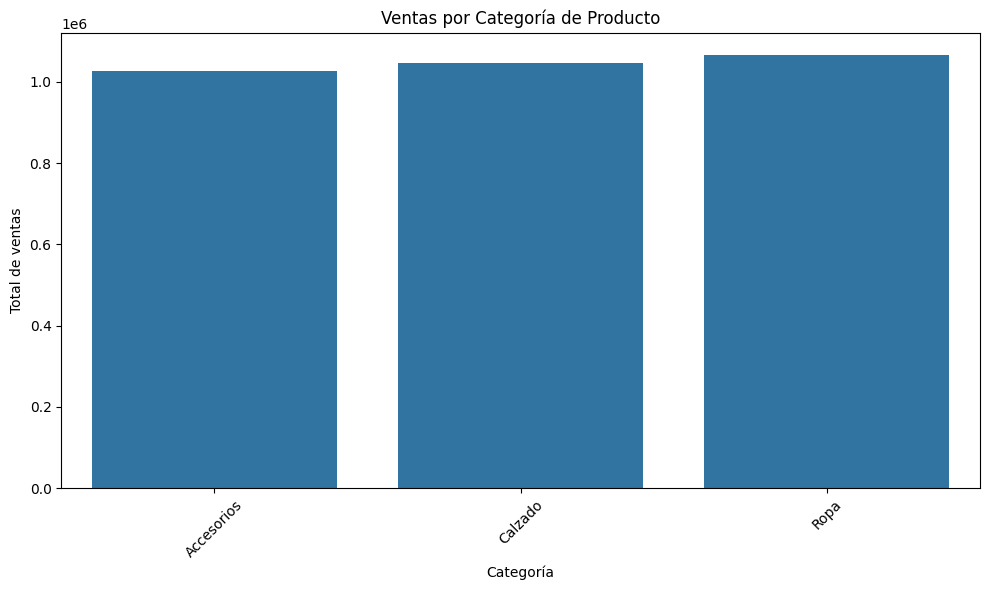

In [49]:
ventas_por_categoria = ventas.groupby("nombre_categoria")["total"].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=ventas_por_categoria, x="nombre_categoria", y="total")
plt.title("Ventas por Categoría de Producto")
plt.xticks(rotation=45)
plt.ylabel("Total de ventas")
plt.xlabel("Categoría")
plt.tight_layout()
plt.show()

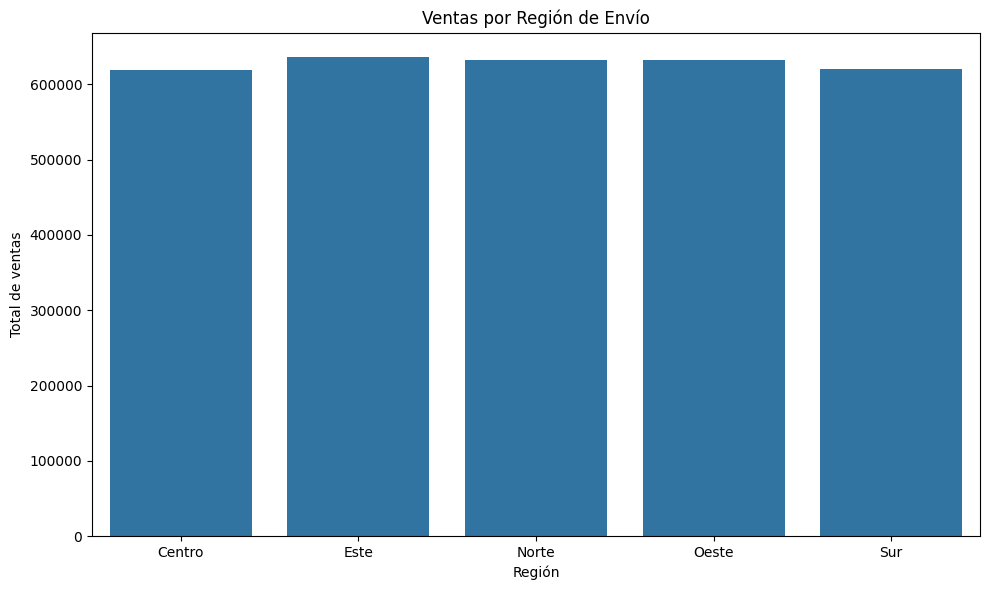

In [50]:
ventas_por_region = ventas.groupby("nombre")["total"].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=ventas_por_region, x="nombre", y="total")
plt.title("Ventas por Región de Envío")
plt.ylabel("Total de ventas")
plt.xlabel("Región")
plt.tight_layout()
plt.show()